In [1]:
from bs4 import BeautifulSoup
import urllib3
import re

import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [2]:
http = urllib3.PoolManager()

i = 0
url = 'https://www.snapdeal.com/product/samsung-24k4100-59-cm-24/631655585656'+'/reviews?page='+str(i+1)+'&sortBy=RECENCY'
response = http.request('GET', url)
soup = BeautifulSoup(response.data)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
titles,reviews = [],[]
import nltk
words = set(nltk.corpus.words.words())
while(soup.find(id='defaultReviewsCard') != None):
    
    for x in soup.find(id='defaultReviewsCard').find_all('p'):
        if x == None:
            review = 'No Title'
        else:
            review = x.string
            
        review = " ".join(re.findall("[a-zA-Z]+", review))
        review = " ".join(w for w in nltk.wordpunct_tokenize(review) if w.lower() in words or not w.isalpha())
        
        reviews.append(review)
    
    for x in soup.find(id='defaultReviewsCard').find_all("div",{"class":"head"}):
        if x == None:
            title = 'No Title'
        else:
            title = x.string
        
        title = " ".join(re.findall("[a-zA-Z]+", title))
        title = " ".join(w for w in nltk.wordpunct_tokenize(title) if w.lower() in words or not w.isalpha())
        
        titles.append(title)
        
    m = 0
    while(m < len(soup.find(id='defaultReviewsCard').find_all("div",{"class":"head"}))):
        print('Review : %d'%(i*10+(m+1)))
        print('Title : %s'%titles[i*10+m])
        print('Content : %s'%reviews[i*10+m])
        print('***--------------***') 
        m += 1
    
    i += 1
    url = 'https://www.snapdeal.com/product/samsung-24k4100-59-cm-24/631655585656'+'/reviews?page='+str(i+1)+'&sortBy=RECENCY'
    response = http.request('GET', url)
    soup = BeautifulSoup(response.data)

Review : 1
Title : Led
Content : Good Product
***--------------***
Review : 2
Title : Great product
Content : great product
***--------------***
Review : 3
Title : Perfect item
Content : Delivery and installation on time I m happy this product
***--------------***
Review : 4
Title : Gud but you make some dumb of people
Content : Gud but you make some dumb of people
***--------------***
Review : 5
Title : Nice product
Content : It is very nice product
***--------------***
Review : 6
Title : Yes I will recommend this product
Content : Yes I will recommend this product
***--------------***
Review : 7
Title : 


C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Content : Good one
***--------------***
Review : 8
Title : Good Budget
Content : Average screen size good sound picture quality Good in medium budget range
***--------------***
Review : 9
Title : Best service by
Content : Good picture quality but sound quality of speaker not Best but rest
***--------------***
Review : 10
Title : Good Product
Content : very good picture sound nice value for money
***--------------***
Review : 11
Title : led k
Content : led k good
***--------------***
Review : 12
Title : prefect product by
Content : good in this product is and remote sensor is very good quality
***--------------***
Review : 13
Title : Nice one
Content : are also you record directly on pen drive with a tap on remote
***--------------***
Review : 14
Title : k led
Content : PICTURE QUALITY IS GOOD BUT SOUND ONLY BELOW FOR EXPECTATION SNAP DEAL BEFORE THE DELIVERY DATE AND ALSO IS VERY PERFECT GOOD FOR THIS PRICE RANGE IN LED
***--------------***
Review : 15
Title : Good Product
Content : sa

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
import pandas as pd
total = list(zip(titles,reviews))
df = pd.DataFrame(data = total, columns = ['Title','Review'])

In [5]:
df.to_csv('samsung-24k4100-59-cm-24.csv',index=False,header=False)
df

,Title,Review
0,Led,Good Product
1,Great product,great product
2,Perfect item,Delivery and installation on time I m happy th...
3,Gud but you make some dumb of people,Gud but you make some dumb of people
4,Nice product,It is very nice product
5,Yes I will recommend this product,Yes I will recommend this product
6,,Good one
7,Good Budget,Average screen size good sound picture quality...
8,Best service by,Good picture quality but sound quality of spea...
9,Good Product,very good picture sound nice value for money


polarity of review no: 1 = 0.350000
polarity of review no: 2 = 0.800000
polarity of review no: 3 = 0.900000
polarity of review no: 4 = -0.375000
polarity of review no: 5 = 0.690000
polarity of review no: 6 = 0.000000
polarity of review no: 7 = 0.350000
polarity of review no: 8 = 0.556250
polarity of review no: 9 = 0.600000
polarity of review no: 10 = 0.668333
polarity of review no: 11 = 0.350000
polarity of review no: 12 = 0.251667
polarity of review no: 13 = 0.600000
polarity of review no: 14 = 0.280000
polarity of review no: 15 = 0.700000
polarity of review no: 16 = 0.700000
polarity of review no: 17 = 0.175000
polarity of review no: 18 = 0.650000
polarity of review no: 19 = 0.516667


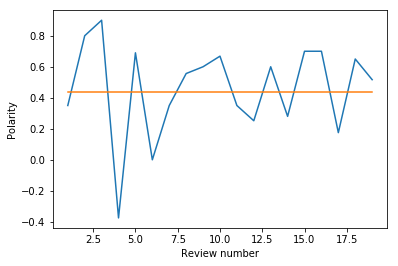

In [6]:
from textblob import TextBlob
import numpy as np

i = 1
x_points = []
y_points = []
        
all_senti = 0.0
for rev in reviews:
    lines = rev.split('.')
    polarity = 0.0
    x = 0
    for line in lines:
        tb = TextBlob(line)
        line_pol = tb.sentiment.polarity
        polarity += line_pol
        if(line_pol!=0.0) : x += 1
    polarity += TextBlob(titles[i-1]).sentiment.polarity
    total_senti = polarity/float(x+1)
    all_senti += total_senti 
    x_points.append(i)
    y_points.append(total_senti)
    print('polarity of review no: %d = %f'%(i,total_senti))
    i += 1
        
all_senti = all_senti/float(i)
    
y = np.tile(all_senti,(i-1,1))
    
import matplotlib.pyplot as plt
plt.plot(x_points,y_points)
plt.plot(x_points,y)
plt.xlabel('Review number')
plt.ylabel('Polarity')
plt.savefig('samsung-24k4100-59-cm-24')
plt.show()